This is our notebook that allows us to test the previously trained algorithms against different datasets. You will need some things before starting to run the code:
- You will need the .joblib algorithm files from the previoius notebook and upload them into here
- You will need to download the datasets you want to test the algorithms with.
  - Note: It will take a while to upload the dataset zip files (for me some took 30 minutes to 1 hour +), so be patient and keep the window open while it is uploading. Try to not allow your computer to go to sleep because that might interrupt the upload and you will have to restart.

You will also have to pay attention to where you are telling the code what directory you want to pull a algorithm or dataset from. I will tell you exactly what in the code needs to be changed if you want to test different algorithms or datasets.

---

For the first block of code, this just allow us to upload the .joblib algorithm files. Just run the code and upload the algorithm and it will go into the "content/models" folder automatically.

In [5]:
# Spring 2026 Capstone
# William Carroll
# Jessica Brown
# Sydney Halupa

from google.colab import files
import os, shutil

os.makedirs("/content/models", exist_ok=True)

uploaded = files.upload()  # pick your .joblib files

for fn in uploaded.keys():
    if fn.lower().endswith(".joblib"):
        shutil.move(f"/content/{fn}", f"/content/models/{fn}")

!ls -lah /content/models



Saving knn_tamper_detector_CT.joblib to knn_tamper_detector_CT.joblib
total 34M
drwxr-xr-x 2 root root 4.0K Jan 31 13:31 .
drwxr-xr-x 1 root root 4.0K Jan 31 13:31 ..
-rw-r--r-- 1 root root  73K Jan 31 13:31 dt_tamper_detector_CT.joblib
-rw-r--r-- 1 root root 1.4M Jan 31 13:31 knn_tamper_detector_CT.joblib
-rw-r--r-- 1 root root 1.7K Jan 31 13:31 logreg_tamper_detector_CT.joblib
-rw-r--r-- 1 root root  32M Jan 31 13:30 rf_tamper_detector_CT.joblib
-rw-r--r-- 1 root root 583K Jan 31 13:31 svm_tamper_detector_CT.joblib


Here we are able to upload the datasets we want to test against the algorithms. Again, be prepared to be uploading for more than 30 minutes, especially if the dataset is close to 1 TB. Once downloaded, it will save a zip file here and place the dataset into "content/datasets". However, try to keep the window open and active because if your runtime ends on Google Colab it will wipe everything and you will have to redownload the dataset.

---
**What Needs to Change**

If you want to name the dataset correctly then you will need to change "DATA_DIR". Optionally, if you want to see what is inside the dataset you just downloaded, then you would need to change the lines:
- !find /content/datasets/... -maxdepth 3 -type d | head -n 80
- !find /content/datasets/... -type f | head -n 40

For example, If I download the "Tampered_Covid" dataset and I wanted to name it as such, then the DATA_DIR would look like:
- DATA_DIR = "/content/datasets/Tampered_Covid"

And if you want to see the output of the "Tampered_Covid" dataset, then the two lines that would need to change to are:
- !find /content/datasets/Tampered_Covid -maxdepth 3 -type d | head -n 80
- !find /content/datasets/Tampered_Covid -type f | head -n 40

Note: Whenever you want to add another dataset, you MUST change the DATA_DIR directory if you want to make the dataset you are uploading separate from previously uploaded ones. Otherwise, it will write over the dataset that is currently in that path.

In [63]:
from google.colab import files
import os, zipfile

# ==========================================
# CHANGE THIS LINE
# ==========================================
DATA_DIR = "/content/datasets/Med_Tampered"
# ==========================================
os.makedirs(DATA_DIR, exist_ok=True)

uploaded = files.upload()  # select the dataset zip

zip_name = [k for k in uploaded.keys() if k.lower().endswith(".zip")][0]
zip_path = f"/content/{zip_name}"

with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(DATA_DIR)

print("Extracted to:", DATA_DIR)
# ==========================================
# CHANGE THESE TWO LINES
# ==========================================
!find /content/datasets/... -maxdepth 3 -type d | head -n 80
!find /content/datasets/... -type f | head -n 40
# ==========================================


Saving MedicalImageTamper.zip to MedicalImageTamper.zip
Extracted to: /content/datasets/Med_Tampered
/content/datasets/...
/content/datasets/.../MRI
/content/datasets/.../MRI/Signa HDxt
/content/datasets/.../MRI/Signa HDxt/Breast_MRI_162
/content/datasets/.../MRI/Signa HDxt/Breast_MRI_243
/content/datasets/.../MRI/Signa HDxt/Breast_MRI_025
/content/datasets/.../MRI/Signa HDxt/Breast_MRI_151
/content/datasets/.../MRI/Signa HDxt/Breast_MRI_309
/content/datasets/.../MRI/Signa HDxt/Breast_MRI_038
/content/datasets/.../MRI/Signa HDxt/Breast_MRI_130
/content/datasets/.../MRI/Optima MR450w
/content/datasets/.../MRI/Optima MR450w/Breast_MRI_118
/content/datasets/.../MRI/Optima MR450w/Breast_MRI_856
/content/datasets/.../MRI/Optima MR450w/Breast_MRI_573
/content/datasets/.../MRI/Optima MR450w/Breast_MRI_712
/content/datasets/.../MRI/Optima MR450w/Breast_MRI_508
/content/datasets/.../MRI/Optima MR450w/Breast_MRI_339
/content/datasets/.../MRI/Optima MR450w/Breast_MRI_187
/content/datasets/.../MRI

The 3rd block allow us to spit the dataset into the respective splits. The code should be able to distinguish tampered vs untampered datasets, but please double check the output if it throws errors, there's a chance that something might not work and we would need to add a detector to detect the dataset format (because some are weirdly set up and no two are the same structurally).

---
**What Needs to Change**

At the top you should see:
- BASE_DIR = "/content/datasets/..."
- OUT_DIR  = "/content/splits/..."

BASE_DIR is where you are directing the code to the DATASET you want to split, OUT_DIR is telling the code WHERE to put the dataset.

For example, if I downloaded a dataset called "Tampered_Covid" located in the directory "/content/datasets/Tampered_Covid" then the BASE_DIR would be:
- BASE_DIR = "/content/datasets/Tampered_Covid"

Then lets say I want to split that dataset into the "splits" folder named "Tampered_Covid_Split", the OUT_DIR would be:
- OUT_DIR  = "/content/splits/Tampered_Covid_Split"

In [64]:
import os, shutil
import pandas as pd
from glob import glob
from sklearn.model_selection import train_test_split

# =========================
# CHANGE THESE TWO LINES
# =========================
BASE_DIR = "/content/datasets/Med_Tampered"
OUT_DIR  = "/content/splits/Med_Tampered_TEST"
# =========================

RANDOM_SEED = 42
TRAIN_RATIO, VAL_RATIO, TEST_RATIO = 0.70, 0.15, 0.15
assert abs((TRAIN_RATIO + VAL_RATIO + TEST_RATIO) - 1.0) < 1e-9

USE_SYMLINKS = True

IMG_EXTS   = (".png", ".jpg", ".jpeg", ".bmp", ".tif", ".tiff")
DICOM_EXTS = (".dcm",)
NPY_EXTS   = (".npy",)

# ---------- helpers ----------
def files_with_exts(root, exts):
    # case-insensitive extension match
    all_files = glob(os.path.join(root, "**", "*"), recursive=True)
    exts_l = tuple(e.lower() for e in exts)
    return sorted([p for p in all_files if os.path.isfile(p) and p.lower().endswith(exts_l)])

def all_data_files(root):
    return (files_with_exts(root, IMG_EXTS) +
            files_with_exts(root, DICOM_EXTS) +
            files_with_exts(root, NPY_EXTS))

def ensure_empty_dir(path):
    if os.path.exists(path):
        shutil.rmtree(path)
    os.makedirs(path, exist_ok=True)

def safe_link_or_copy(src, dst):
    os.makedirs(os.path.dirname(dst), exist_ok=True)
    if os.path.exists(dst):
        return
    if USE_SYMLINKS:
        os.symlink(src, dst)
    else:
        shutil.copy2(src, dst)

def split_stratified_or_clean_only(df):
    # df must have filepath,label
    if df["label"].nunique() == 1:
        # clean-only OR tampered-only dataset: split without stratify
        train_df, tmp_df = train_test_split(df, test_size=(1-TRAIN_RATIO), random_state=RANDOM_SEED, shuffle=True)
        val_frac = VAL_RATIO / (VAL_RATIO + TEST_RATIO)
        val_df, test_df = train_test_split(tmp_df, test_size=(1-val_frac), random_state=RANDOM_SEED, shuffle=True)
    else:
        train_df, tmp_df = train_test_split(
            df, test_size=(1-TRAIN_RATIO), random_state=RANDOM_SEED, stratify=df["label"]
        )
        val_frac = VAL_RATIO / (VAL_RATIO + TEST_RATIO)
        val_df, test_df = train_test_split(
            tmp_df, test_size=(1-val_frac), random_state=RANDOM_SEED, stratify=tmp_df["label"]
        )

    train_df = train_df.assign(split="train")
    val_df   = val_df.assign(split="val")
    test_df  = test_df.assign(split="test")
    return pd.concat([train_df, val_df, test_df], ignore_index=True)

def write_split_folders(df, out_dir):
    ensure_empty_dir(out_dir)

    for i, row in df.iterrows():
        src   = row["filepath"]
        split = row["split"]
        label = int(row["label"])
        cls   = "clean" if label == 0 else "tampered"

        base = os.path.basename(src)
        out_name = f"{i:08d}_{base}"
        dst = os.path.join(out_dir, split, cls, out_name)
        safe_link_or_copy(src, dst)

    def count_files(p):
        return len([x for x in glob(os.path.join(p, "*")) if os.path.isfile(x)])

    print("\nFinal counts:")
    for split in ["train","val","test"]:
        for cls in ["clean","tampered"]:
            p = os.path.join(out_dir, split, cls)
            print(f"{split:5s} {cls:8s}:", count_files(p))

# ---------- detectors ----------
def detect_already_split_layout(base_dir):
    # base_dir/{train,val,test}/{clean,tampered}/...
    ok = all(os.path.isdir(os.path.join(base_dir, s)) for s in ["train","val","test"])
    if not ok:
        return None
    rows = []
    for split in ["train","val","test"]:
        for cls, lab in [("clean",0),("tampered",1)]:
            p = os.path.join(base_dir, split, cls)
            if not os.path.isdir(p):
                continue
            # <<< UPDATED: include npy too
            files = all_data_files(p)
            for f in files:
                rows.append({"filepath": f, "label": lab, "split": split})
    if len(rows) == 0:
        return None
    return pd.DataFrame(rows)

def detect_image_tamper_dataset(base_dir):
    # Kaggle "image-tamper-dataset": original + tamper folders
    clean_dir = os.path.join(base_dir, "original")
    tamp_dirs = [os.path.join(base_dir, x) for x in ["copy_move","copy_paste","content_removal","text_addition"]]
    if not os.path.isdir(clean_dir):
        return None
    tamp_dirs = [d for d in tamp_dirs if os.path.isdir(d)]
    if len(tamp_dirs) == 0:
        return None

    clean = all_data_files(clean_dir)
    tamp = []
    for d in tamp_dirs:
        tamp += all_data_files(d)

    if len(clean) == 0 or len(tamp) == 0:
        return None

    df = pd.DataFrame({"filepath": clean + tamp, "label": ([0]*len(clean)) + ([1]*len(tamp))})
    return df

def detect_clean_tampered_folders_anywhere(base_dir):
    # finds any folders named clean and tampered under base_dir
    clean_dirs = [d for d in glob(os.path.join(base_dir, "**", "clean"), recursive=True) if os.path.isdir(d)]
    tamp_dirs  = [d for d in glob(os.path.join(base_dir, "**", "tampered"), recursive=True) if os.path.isdir(d)]
    if len(clean_dirs) == 0 or len(tamp_dirs) == 0:
        return None

    clean, tamp = [], []
    for d in clean_dirs:
        clean += all_data_files(d)
    for d in tamp_dirs:
        tamp  += all_data_files(d)

    if len(clean) == 0 or len(tamp) == 0:
        return None

    df = pd.DataFrame({"filepath": clean + tamp, "label": ([0]*len(clean)) + ([1]*len(tamp))})
    return df

def detect_by_top_folder_rules(base_dir, clean_folders, tampered_prefixes=()):
    # labels by top-level folder name under base_dir
    all_files = all_data_files(base_dir)
    if len(all_files) == 0:
        return None

    clean, tamp = [], []
    for f in all_files:
        rel = os.path.relpath(f, base_dir)
        top = rel.split(os.sep)[0].lower()

        if top in {x.lower() for x in clean_folders}:
            clean.append(f)
        elif any(top.startswith(p.lower()) for p in tampered_prefixes):
            tamp.append(f)

    if len(clean) == 0 or len(tamp) == 0:
        # allow fallback if it's untampered-only
        if len(clean) == 0 and len(tamp) == 0:
            return None
        if len(tamp) == 0 and len(clean) > 0:
            # clean-only dataset
            return pd.DataFrame({"filepath": clean, "label": [0]*len(clean)})
        return None

    return pd.DataFrame({"filepath": clean + tamp, "label": ([0]*len(clean)) + ([1]*len(tamp))})

def detect_untampered_only(base_dir):
    # last resort: treat everything as clean
    all_files = all_data_files(base_dir)
    if len(all_files) == 0:
        return None
    return pd.DataFrame({"filepath": all_files, "label": [0]*len(all_files)})

# BTD DETECTOR
def _find_dir_named_anywhere(root, target_name):
    target = target_name.lower()
    for dirpath, dirnames, _ in os.walk(root):
        for dn in dirnames:
            if dn.lower() == target:
                return os.path.join(dirpath, dn)
    return None

def _find_child_dir_ci(parent, name):
    if not os.path.isdir(parent):
        return None
    target = name.lower()
    for dn in os.listdir(parent):
        p = os.path.join(parent, dn)
        if os.path.isdir(p) and dn.lower() == target:
            return p
    return None

def _collect_files_from_dirs(dirs):
    out = []
    for d in dirs:
        out += all_data_files(d)
    return sorted(set(out))

def _make_df(clean_dirs, tampered_dirs):
    clean_files = _collect_files_from_dirs(clean_dirs)
    tamp_files  = _collect_files_from_dirs(tampered_dirs)
    if len(clean_files) == 0 or len(tamp_files) == 0:
        return None
    return pd.DataFrame({
        "filepath": clean_files + tamp_files,
        "label": ([0]*len(clean_files)) + ([1]*len(tamp_files))
    })

def _find_ct_root_for_btd(base_dir):
    ct0 = _find_child_dir_ci(base_dir, "CT")
    candidates = [ct0] if ct0 else []
    ct_any = _find_dir_named_anywhere(base_dir, "CT")
    if ct_any and ct_any not in candidates:
        candidates.append(ct_any)

    for ct in candidates:
        inj = _find_child_dir_ci(ct, "injection")
        rem = _find_child_dir_ci(ct, "removal")
        if not inj or not rem:
            continue
        if _find_child_dir_ci(inj, "TM") and _find_child_dir_ci(rem, "TB"):
            return ct
    return None

def detect_btd_all(base_dir):
    """
    Returns df(filepath,label) for BTD (clean vs tampered), combining:
      CT injection: TM vs FM_CTGAN, TM vs FM_SD
      CT removal  : TB vs FB_CTGAN, TB vs FB_SD
    """
    ct_root = _find_ct_root_for_btd(base_dir)
    if not ct_root:
        return None

    inj = _find_child_dir_ci(ct_root, "injection")
    rem = _find_child_dir_ci(ct_root, "removal")

    tm = _find_child_dir_ci(inj, "TM")
    fm_ctgan = _find_child_dir_ci(inj, "FM_CTGAN")
    fm_sd    = _find_child_dir_ci(inj, "FM_SD")

    tb = _find_child_dir_ci(rem, "TB")
    fb_ctgan = _find_child_dir_ci(rem, "FB_CTGAN")
    fb_sd    = _find_child_dir_ci(rem, "FB_SD")

    dfs = []
    if tm and fm_ctgan:
        df = _make_df([tm], [fm_ctgan])
        if df is not None: dfs.append(df)
    if tm and fm_sd:
        df = _make_df([tm], [fm_sd])
        if df is not None: dfs.append(df)
    if tb and fb_ctgan:
        df = _make_df([tb], [fb_ctgan])
        if df is not None: dfs.append(df)
    if tb and fb_sd:
        df = _make_df([tb], [fb_sd])
        if df is not None: dfs.append(df)

    if len(dfs) == 0:
        return None

    mri_root = _find_child_dir_ci(base_dir, "MRI") or _find_dir_named_anywhere(base_dir, "MRI")
    print("BTD CT root detected at:", ct_root)
    if mri_root:
        print("BTD MRI root detected at:", mri_root)

    df_all = pd.concat(dfs, ignore_index=True).drop_duplicates(subset=["filepath"]).reset_index(drop=True)
    return df_all

# ---------- main ----------
print("BASE_DIR:", BASE_DIR)
print("OUT_DIR :", OUT_DIR)
print("Link mode:", "symlink" if USE_SYMLINKS else "copy")

# Chekcs if the dataset is already split
df0 = detect_already_split_layout(BASE_DIR)
if df0 is not None:
    print("Using existing split layout (no re-splitting). Rows:", len(df0))
    display(df0.head())
    raise SystemExit

# BTD HANDLING
df_btd = detect_btd_all(BASE_DIR)
if df_btd is not None:
    print("Detected BTD rows:", len(df_btd), " label counts:", df_btd["label"].value_counts().to_dict())

    df_split = split_stratified_or_clean_only(df_btd)
    df_split.to_csv(OUT_DIR + "_manifest.csv", index=False)
    print("Saved manifest:", OUT_DIR + "_manifest.csv")

    write_split_folders(df_split, OUT_DIR)
    print("\nDone. Splits ready at:", OUT_DIR)
    raise SystemExit

# Try known tamper datasets
df = detect_image_tamper_dataset(BASE_DIR)
if df is None:
    df = detect_clean_tampered_folders_anywhere(BASE_DIR)

# Optional: add one dataset-specific rule-set here (easy to extend)
# Example: COVID forgery 9classes style:
if df is None:
    df = detect_by_top_folder_rules(
        BASE_DIR,
        clean_folders=["COVID-19", "Normal", "Viral"],
        tampered_prefixes=["F "]  # matches "F CM ...", "F S ..."
    )

# If still nothing: treat as untampered-only
if df is None:
    df = detect_untampered_only(BASE_DIR)
    print("No tamper labels detected. Treating dataset as CLEAN-ONLY.")

print("Detected rows:", len(df), " label counts:", df["label"].value_counts().to_dict())

df_split = split_stratified_or_clean_only(df)
df_split.to_csv(OUT_DIR + "_manifest.csv", index=False)
print("Saved manifest:", OUT_DIR + "_manifest.csv")

write_split_folders(df_split, OUT_DIR)
print("\nDone. Splits ready at:", OUT_DIR)





BASE_DIR: /content/datasets/Med_Tampered
OUT_DIR : /content/splits/Med_Tampered_TEST
Link mode: symlink
Detected rows: 13030  label counts: {1: 10424, 0: 2606}
Saved manifest: /content/splits/Med_Tampered_TEST_manifest.csv

Final counts:
train clean   : 1824
train tampered: 7296
val   clean   : 391
val   tampered: 1564
test  clean   : 391
test  tampered: 1564

Done. Splits ready at: /content/splits/Med_Tampered_TEST


Our last block is the code that allows us to test the algorithms agaisnt the dataset splits we made earlier. Here, you will select the model and the dataset you want to test against.

---
**What Needs to Change**

At the top you will see:
- TAMPER_SPLIT_DIR = "/content/splits/..."
- MODEL_PATH = "/content/models/..."

TAMPER_SPLIT_DIR is the directory where we just created the DATSET SPLIT (not the original dataset), and the MODEL_PATH is directing the code to the MODEL you downloaded and placed within the "/content/models/..." folder in the beginning.

For example, we will use the previously split dataset located at "/content/splits/Tampered_Covid_Split" and the SVM model named "svm_tamper_detector_CT.joblib" in "/content/models" the TAMPER_SPLIT_DIR would be:
- TAMPER_SPLIT_DIR = "/content/splits/Tampered_Covid_Split"

and the MODEL_PATH would be:
- MODEL_PATH = "/content/models/svm_tamper_detector_CT.joblib"


TRAIN -> using 1824 clean + 7296 tampered


TRAIN TAMPERED feature extraction: 100%|██████████| 7296/7296 [01:14<00:00, 97.40img/s]



VAL -> using 391 clean + 1564 tampered


VAL TAMPERED feature extraction: 100%|██████████| 1564/1564 [00:15<00:00, 99.08img/s] 



TEST -> using 391 clean + 1564 tampered


TEST TAMPERED feature extraction: 100%|██████████| 1564/1564 [00:16<00:00, 96.99img/s] 



Loaded model: /content/models/svm_tamper_detector_CT.joblib

=== TRAIN ===
Confusion Matrix [[TN FP],[FN TP]]:
 [[ 752 1072]
 [3082 4214]]
              precision    recall  f1-score   support

       Clean       0.20      0.41      0.27      1824
    Tampered       0.80      0.58      0.67      7296

    accuracy                           0.54      9120
   macro avg       0.50      0.49      0.47      9120
weighted avg       0.68      0.54      0.59      9120


=== VALIDATION ===
Confusion Matrix [[TN FP],[FN TP]]:
 [[150 241]
 [674 890]]
              precision    recall  f1-score   support

       Clean       0.18      0.38      0.25       391
    Tampered       0.79      0.57      0.66      1564

    accuracy                           0.53      1955
   macro avg       0.48      0.48      0.45      1955
weighted avg       0.67      0.53      0.58      1955


=== TEST ===
Confusion Matrix [[TN FP],[FN TP]]:
 [[164 227]
 [665 899]]
              precision    recall  f1-score   suppor

,Split,Accuracy,Precision,Recall,F1-score,Specificity (TNR),TN,FP,FN,TP,N_Clean,N_Tampered
0,Train,0.5445,0.7972,0.5776,0.6698,0.4123,752,1072,3082,4214,1824,7296
1,Validation,0.5320,0.7869,0.5691,0.6605,0.3836,150,241,674,890,391,1564
2,Test,0.5437,0.7984,0.5748,0.6684,0.4194,164,227,665,899,391,1564


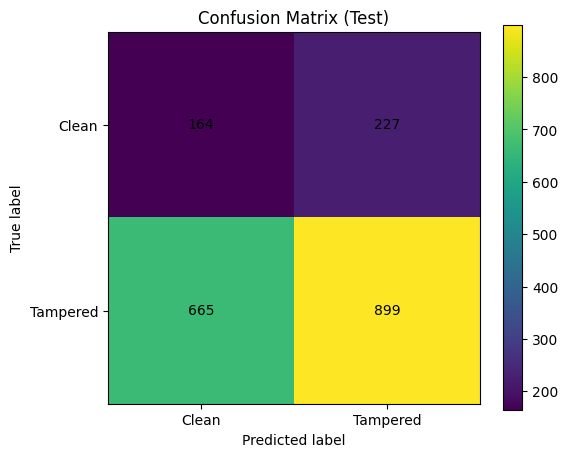

In [65]:
!pip install -q scikit-learn scikit-image opencv-python numpy joblib tqdm pandas pydicom matplotlib

import os
import numpy as np
import cv2
import joblib
import pandas as pd
from glob import glob
from tqdm import tqdm
import pydicom

from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

# ==========================================
# CHANGE THESE TWO LINES
# ==========================================
TAMPER_SPLIT_DIR = "/content/splits/Med_Tampered_TEST"
MODEL_PATH = "/content/models/svm_tamper_detector_CT.joblib"
# ==========================================

# Unified loader (DICOM + images + NPY) with CT-style normalization
def load_u8_any(path: str, target_size=None):
    ext = os.path.splitext(path)[1].lower()

    # --- NPY path ---
    if ext == ".npy":
        try:
            arr = np.load(path)
        except Exception:
            return None

        # Make sure it's 2D grayscale
        img = arr

        img = np.squeeze(img)

        if img.ndim == 3 and img.shape[-1] in (1, 3):
            if img.shape[-1] == 3:
                img = cv2.cvtColor(img.astype(np.float32), cv2.COLOR_BGR2GRAY)
            else:
                img = img[..., 0]

        elif img.ndim == 3 and img.shape[0] in (1, 3):
            if img.shape[0] == 3:
                img = np.transpose(img, (1, 2, 0))
                img = cv2.cvtColor(img.astype(np.float32), cv2.COLOR_BGR2GRAY)
            else:
                img = img[0, :, :]

        if img.ndim != 2:
            return None

        img = img.astype(np.float32)

    # --- DICOM path ---
    elif ext == ".dcm":
        try:
            ds = pydicom.dcmread(path, force=True)
            img = ds.pixel_array.astype(np.float32)

            slope = float(getattr(ds, "RescaleSlope", 1.0))
            intercept = float(getattr(ds, "RescaleIntercept", 0.0))
            img = img * slope + intercept
        except Exception:
            return None

    # --- Normal image path ---
    else:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            return None
        img = img.astype(np.float32)

    # Optional: force a consistent size
    if target_size is not None:
        img = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA).astype(np.float32)

    # CT-GAN-like robust normalization (p1..p99)
    lo = np.percentile(img, 1)
    hi = np.percentile(img, 99)
    if hi <= lo:
        hi = lo + 1.0

    img = np.clip(img, lo, hi)
    img = (img - lo) / (hi - lo)

    return (img * 255.0).astype(np.uint8)

# Feature extraction (unchanged)
def extract_features(img_u8: np.ndarray) -> np.ndarray:
    if img_u8.ndim != 2:
        img_u8 = cv2.cvtColor(img_u8, cv2.COLOR_BGR2GRAY)

    mean = float(np.mean(img_u8))
    std = float(np.std(img_u8))
    mn = float(np.min(img_u8))
    mx = float(np.max(img_u8))
    median = float(np.median(img_u8))

    edges = cv2.Canny(img_u8, 50, 150)
    edge_density = float(np.mean(edges > 0))

    lap_var = float(cv2.Laplacian(img_u8, cv2.CV_64F).var())
    ent = float(shannon_entropy(img_u8))

    quant = (img_u8 // 16).astype(np.uint8)
    glcm = graycomatrix(
        quant,
        distances=[1, 2],
        angles=[0, np.pi/4, np.pi/2],
        levels=16,
        symmetric=True,
        normed=True
    )

    contrast = float(graycoprops(glcm, "contrast").mean())
    correlation = float(graycoprops(glcm, "correlation").mean())
    energy = float(graycoprops(glcm, "energy").mean())
    homogeneity = float(graycoprops(glcm, "homogeneity").mean())

    return np.array([
        mean, std, mn, mx, median,
        edge_density, lap_var, ent,
        contrast, correlation, energy, homogeneity
    ], dtype=np.float32)

def get_split_files(split_name, class_name):
    exts = ["png","jpg","jpeg","bmp","tif","tiff","dcm","npy"]
    files = []
    for e in exts:
        files += glob(os.path.join(TAMPER_SPLIT_DIR, split_name, class_name, f"*.{e}"))
    return sorted(files)

def build_Xy_from_images(clean_paths, tampered_paths, tag=""):
    X, y = [], []

    for p in tqdm(clean_paths, desc=f"{tag} CLEAN feature extraction", unit="img"):
        img_u8 = load_u8_any(p, target_size=None)
        if img_u8 is None:
            continue
        X.append(extract_features(img_u8))
        y.append(0)

    for p in tqdm(tampered_paths, desc=f"{tag} TAMPERED feature extraction", unit="img"):
        img_u8 = load_u8_any(p, target_size=None)
        if img_u8 is None:
            continue
        X.append(extract_features(img_u8))
        y.append(1)

    return np.array(X), np.array(y)

def load_split(split_name):
    clean = get_split_files(split_name, "clean")
    tamp  = get_split_files(split_name, "tampered")

    print(f"\n{split_name.upper()} -> using {len(clean)} clean + {len(tamp)} tampered")
    return build_Xy_from_images(clean, tamp, tag=split_name.upper())

# Load data
X_train, y_train = load_split("train")
X_val, y_val     = load_split("val")
X_test, y_test   = load_split("test")

# Load trained model
model = joblib.load(MODEL_PATH)
print("\nLoaded model:", MODEL_PATH)

def eval_split(name, X, y):
    preds = model.predict(X)
    print(f"\n=== {name} ===")

    cm = confusion_matrix(y, preds, labels=[0,1])
    tn, fp, fn, tp = cm.ravel()
    print("Confusion Matrix [[TN FP],[FN TP]]:\n", cm)

    if y.sum() == 0:
        fpr = fp / (tn + fp) if (tn + fp) else 0.0
        print(f"False Positive Rate (pred tampered on clean-only): {fpr:.4f}")
        print(f"Specificity / TNR (pred clean on clean-only): {(tn/(tn+fp)):.4f}" if (tn+fp) else "n/a")
        return preds

    print(classification_report(y, preds, target_names=["Clean","Tampered"], zero_division=0))
    return preds

train_preds = eval_split("TRAIN", X_train, y_train)
val_preds   = eval_split("VALIDATION", X_val, y_val)
test_preds  = eval_split("TEST", X_test, y_test)

def metrics_row(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    tn, fp, fn, tp = cm.ravel()

    total = tn + fp + fn + tp
    acc = (tn + tp) / total if total else 0.0

    if int(np.sum(y_true)) == 0:
        fpr = fp / (tn + fp) if (tn + fp) else 0.0
        tnr = tn / (tn + fp) if (tn + fp) else 0.0
        return {
            "Accuracy": acc,
            "False Positive Rate": fpr,
            "Specificity (TNR)": tnr,
            "TN": int(tn), "FP": int(fp), "FN": int(fn), "TP": int(tp),
            "N_Clean": int(tn + fp),
            "N_Tampered": 0
        }

    prec = precision_score(y_true, y_pred, zero_division=0)
    rec  = recall_score(y_true, y_pred, zero_division=0)
    f1   = f1_score(y_true, y_pred, zero_division=0)
    tnr  = tn / (tn + fp) if (tn + fp) else 0.0

    return {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "Specificity (TNR)": tnr,
        "TN": int(tn), "FP": int(fp), "FN": int(fn), "TP": int(tp),
        "N_Clean": int(tn + fp),
        "N_Tampered": int(fn + tp)
    }

metrics_table = pd.DataFrame(
    [metrics_row(y_train, train_preds),
     metrics_row(y_val,   val_preds),
     metrics_row(y_test,  test_preds)],
    index=["Train", "Validation", "Test"]
).round(4)

display(metrics_table.reset_index().rename(columns={"index": "Split"}))

import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, test_preds, labels=[0,1])
plt.figure(figsize=(6, 5))
plt.imshow(cm)
plt.title("Confusion Matrix (Test)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks([0, 1], ["Clean", "Tampered"])
plt.yticks([0, 1], ["Clean", "Tampered"])

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha="center", va="center")

plt.colorbar()
plt.show()



In [66]:
import os
from glob import glob

print("TAMPER_SPLIT_DIR =", TAMPER_SPLIT_DIR)

def nfiles(split, cls):
    return len([p for p in glob(os.path.join(TAMPER_SPLIT_DIR, split, cls, "*")) if os.path.isfile(p)])

for split in ["train","val","test"]:
    c = nfiles(split, "clean")
    t = nfiles(split, "tampered")
    print(f"{split:5s} clean={c}  tampered={t}  total={c+t}")


TAMPER_SPLIT_DIR = /content/splits/Med_Tampered_TEST
train clean=1824  tampered=7296  total=9120
val   clean=391  tampered=1564  total=1955
test  clean=391  tampered=1564  total=1955
